In [1]:
import numpy as np
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO("../models/runs2/detect/train/weights/last.pt")

In [3]:
metrics = model.val(data = "../DATA_overfit/data.yaml", plots = True)

Ultralytics YOLOv8.0.172 🚀 Python-3.9.16 torch-2.0.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3360419 parameters, 0 gradients, 9.7 GFLOPs
val: Scanning /Users/grigoriiott/Documents/Programming/study/DeepMLBohems/AITH-r
val: New cache created: /Users/grigoriiott/Documents/Programming/study/DeepMLBohems/AITH-road-signs-project/yolo_model/DATA_overfit/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        503       1730      0.628      0.536      0.604      0.418
                   1_1        503          6      0.672      0.667      0.764      0.488
                1_11_1        503          8      0.541      0.739      0.703      0.465
                1_11_2        503          3      0.503      0.333      0.365      0.256
                1_12_1        503          3          0          0     0.0258     0.0173
                1_12_2        503          3      0.229      0.667      0.557      0.457
      

                5_15_4        503          3      0.205      0.333      0.146     0.0828
                5_15_5        503         12      0.437        0.5      0.569      0.399
                5_15_6        503          4      0.358       0.25       0.27      0.238
                5_15_7        503         13      0.824      0.363      0.689      0.503
                  5_16        503         31      0.735      0.538      0.583      0.379
                  5_17        503          3          1      0.943      0.995      0.765
                5_19_1        503        114      0.576      0.596      0.563      0.354
                5_19_2        503         85       0.49       0.43      0.403      0.205
                  5_20        503         26      0.826      0.367      0.504      0.343
                  5_21        503          5          1      0.506      0.602      0.409
                  5_22        503          1          1          0      0.497      0.249
                5_24_

In [ ]:
%matplotlib inline
plt.plot(metrics.curves_results[1][0], metrics.curves_results[1][1][0], lw=3)
plt.title(metrics.curves[1])
plt.grid(lw=2, alpha = 0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Проверим работу модели не нескольких реальных кадрах

In [3]:
import glob

In [4]:
img_paths = glob.glob('../test_img/*')

In [5]:
img_paths

['../test_img/4.jpg',
 '../test_img/5.jpg',
 '../test_img/2.jpg',
 '../test_img/3.jpg',
 '../test_img/1.jpg']

In [31]:
img = cv2.imread(img_paths[3])

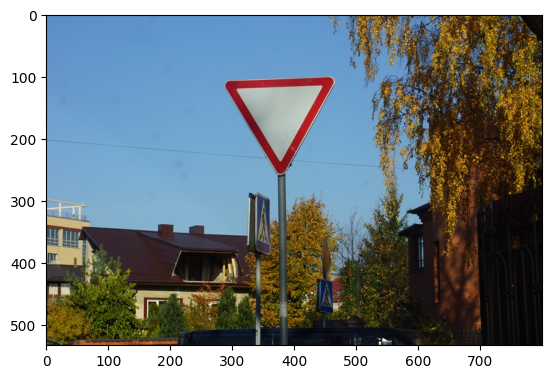

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
cls_list = ['-Road narrows on right', '50 mph speed limit', 'Attention Please-', 
            'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Dangerous Left Curve Ahead', 
            'Dangerous Rright Curve Ahead', 'End of all speed and passing limits', 'Give Way', 
            'Go Straight or Turn Right', 'Go straight or turn left', 'Keep-Left', 'Keep-Right', 
            'Left Zig Zag Traffic', 'No Entry', 'No_Over_Taking', 'Overtaking by trucks is prohibited', 
            'Pedestrian Crossing', 'Round-About', 'Slippery Road Ahead', 'Speed Limit 20 KMPh', 
            'Speed Limit 30 KMPh', 'Stop_Sign', 'Straight Ahead Only', 'Traffic_signal', 
            'Truck traffic is prohibited', 'Turn left ahead', 'Turn right ahead', 'Uneven Road']

def get_img_pred(BGR_img):
    results = model.predict(img, imgsz = 320, conf = 0.5)
    cls = None
    for result in results:
        for  r in result.boxes.data.tolist():
            x1, y1, x2, y2, score, cls = r
            BGR_img = cv2.rectangle(BGR_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            print(cls)
    if cls != None:
        #return (BGR_img, cls_list[int(cls)])
        return (BGR_img, None)
    else:
        return (BGR_img, None)

In [34]:
img, cls = get_img_pred(img)


0: 224x320 1 2_4, 39.7ms
Speed: 1.7ms preprocess, 39.7ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 320)


43.0


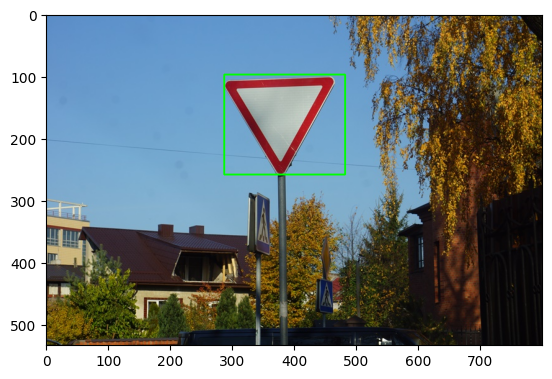

In [35]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
print(cls)

None
